In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [3]:
data_dic = {'label' : ["buying", "maint", "doors", "persons", "lug_boot", "safety", "distribution"]}

data = pd.read_csv("./dataset/car.data", sep=",", names=data_dic["label"])

df = pd.DataFrame(data)
df = pd.get_dummies(df)

X = df.iloc[:, 0:21]
y = df.iloc[:, 21:25]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
data

,buying,maint,doors,persons,lug_boot,safety,distribution
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


In [3]:
model = Sequential([
    Dense(21, input_shape=(21,), activation="relu"),
    Dense(4, activation="softmax"),
])

model.compile(loss="mse", optimizer="adam")

In [4]:
result = model.fit(X_train, y_train, epochs=100, verbose=0, validation_split=0.25)
print(result.history.keys())

dict_keys(['loss', 'val_loss'])


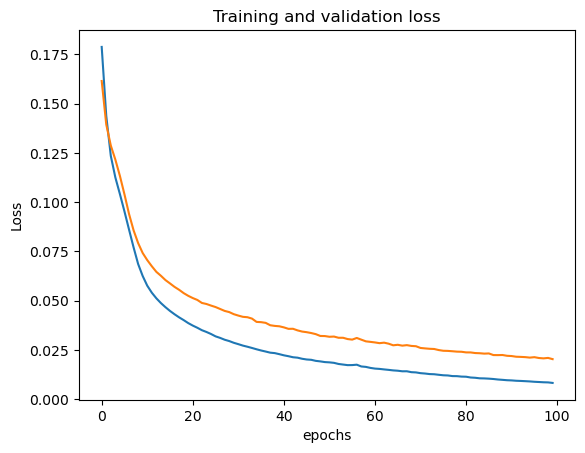

In [5]:
plt.title("Training and validation loss")
plt.xlabel("epochs")
plt.ylabel("Loss")
x = np.arange(0, 100)
plt.plot(result.history['loss'])
plt.plot(result.history['val_loss'])

In [6]:
y_test

,distribution_acc,distribution_good,distribution_unacc,distribution_vgood
599,0,0,1,0
1201,1,0,0,0
628,0,0,1,0
1498,1,0,0,0
1263,0,0,1,0
...,...,...,...,...
1034,0,0,1,0
341,1,0,0,0
147,0,0,1,0
360,0,0,1,0


18/18 [==============================] - 0s 483us/step
120 26 400 25


Text(0.5, 1.0, 'Label')

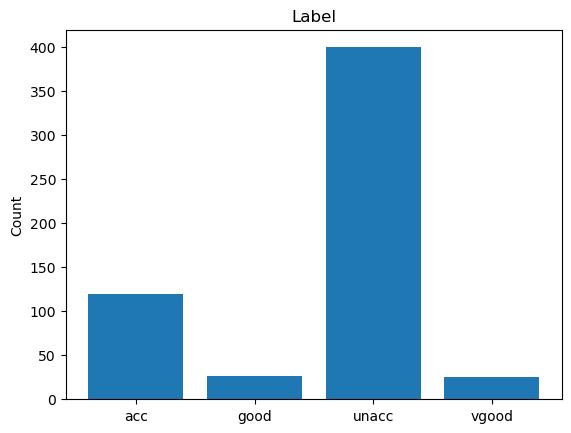

In [7]:
pred = model.predict(X_test)
acc = 0
good = 0
unacc = 0
vgood = 0
for i in pred:
    idx = np.argmax(i)
    if (idx == 0): acc += 1
    elif (idx == 1): good += 1
    elif (idx == 2): unacc += 1
    else: vgood += 1

print(acc, good, unacc, vgood)

x = np.arange(4)
y = [acc, good, unacc, vgood]

plt.bar(x, y)
plt.xticks(x, ["acc", "good", "unacc", "vgood"])
plt.ylabel("Count")
plt.title("Label")

In [8]:
from sklearn.metrics import confusion_matrix

y_test_np = np.array(y_test)

y_test_index = [np.where(r==1)[0][0] for r in y_test_np]

pred_list = []

for i in pred:
    pred_list.append(np.argmax(i))

print(pred_list)
print(y_test_index)

confusion_matrix(pred_list, y_test_index)


[2, 0, 2, 0, 2, 0, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 1, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 1, 2, 0, 2, 2, 0, 3, 2, 0, 0, 2, 2, 2, 2, 2, 1, 3, 2, 2, 2, 2, 3, 2, 2, 2, 3, 0, 2, 0, 3, 0, 2, 1, 2, 2, 2, 1, 2, 2, 2, 0, 2, 2, 2, 2, 1, 1, 0, 2, 2, 0, 2, 2, 2, 2, 2, 0, 1, 2, 2, 2, 2, 1, 2, 0, 0, 2, 1, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 3, 2, 2, 2, 0, 2, 0, 2, 1, 2, 2, 2, 2, 0, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 0, 3, 0, 2, 0, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 1, 0, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 1, 3, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 0, 3, 2, 2, 2, 0, 2, 2, 3, 2, 2, 1, 0, 2, 0, 2, 0, 0, 2, 2, 0, 1, 3, 0, 0, 2, 2, 2, 2, 3, 0, 0, 2, 2, 2, 2, 3, 2, 2, 2, 2, 0, 2, 2, 3, 0, 0, 2, 2, 0, 0, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 

array([[112,   1,   4,   3],
       [  8,  18,   0,   0],
       [  7,   0, 393,   0],
       [  2,   1,   0,  22]])